<a href="https://colab.research.google.com/github/legobitna/DeepLearning-basic/blob/main/9_2_%5Blecture%5D_intermediate_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTERMEDIATE OPENCV: IMAGE SEGMENTATION

![](https://d1sr9z1pdl3mb7.cloudfront.net/wp-content/uploads/2020/06/08160144/object-detection.png)

In digital image processing and computer vision, **image segmentation** is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

**Image segmentation** is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

Several fundamental techniques that will be introduced in this notebook including: **Blurring**, **Threshholding**, **Edge Detecting**, and **Contouring**.  

## QUICK NOTE: 

**1. Installation on localhost or VM**

`pip install opencv-contrib-python` OR `conda install -c conda-forge opencv`

**2. Display image using OpenCV**

In Colab: `cv2_imshow`

In local or VM: 
```
cv2.imshow("image_name", image)
cv2.waitKey(0)
```

   

## 0. _getting started_

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow #only in Colab because using cv2.imshow is not allowed in Colab
cv2.__version__

'4.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
FOLDER = "/content/drive/My Drive/FTMLE | 2020.09 | Kermadec/Week 9/images"

Image Size: (233, 350, 3)


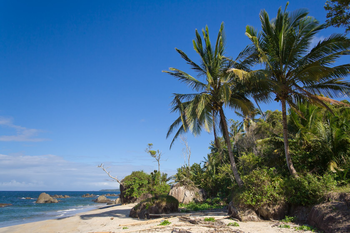

In [ ]:
# create path to file
filename = "beach.png"
path = os.path.join(FOLDER, filename)

image = cv2.imread(path)
print("Image Size: {}".format(image.shape))
cv2_imshow(image)

## 1. HISTOGRAM

In [ ]:
print("Orignal")
cv2_imshow(image)

print("Grayscale")
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

# calculate the histogram and show it on mathplotlib
# cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([grayscale], [0], None, [256], [0,256])

plt.figure()
plt.plot(hist)
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.xlim([0,256])
plt.show()

In [ ]:
#Now compute using OpenCV cv2.calcHist for each channel( Note that the order is Red -> Green -> Blue)
opencv_h=[] 
opencv_h.append(cv2.calcHist([image],[2],None,[256],[0,256]))
opencv_h.append(cv2.calcHist([image],[1],None,[256],[0,256]))
opencv_h.append(cv2.calcHist([image],[0],None,[256],[0,256]))

# Color image
colors = ['red', 'green', 'blue']

for i in range(3):
    plt.plot(opencv_h[i], color=colors[i])

## 2. THRESHOLDING

In digital image processing, **thresholding** is the simplest method of segmenting images.

![](https://scipy-lectures.org/_images/sphx_glr_plot_threshold_001.png)

The method creates a binary image based on setting a threshold value on the pixel intensity of the original image. The threshold of image intensity (relative image lightness) is set manually at a specific value or automatically set by an application. **Pixels below that set threshold value are converted to black (bit value of zero), and pixels above the threshold value are converted to white (a bit value of one).** The thresholding process is sometimes described as separating an image into foreground values (black) and background values (white). The method works best on bimodal image.

While most commonly applied to grayscale images, it can also be applied to color images.

In order to implement it in OpenCV, simply use `cv2.threshold`. 

```
cv2.threshold(input, threshold_value, max_value, thresholding_type)
```


* `input`: input image

* `threshold_value`: threshold value which is used to classify the pixel values.

* `max_value`: maximum value which is assigned to pixel values exceeding the threshold. 

* `thresholding_type`: 

<img src="https://i.imgur.com/rTql1CP.png" width="700"/> <img src="https://docs.opencv.org/3.4/threshold.jpg" width="700"/>



*Result from different threshold methods*

More Info: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

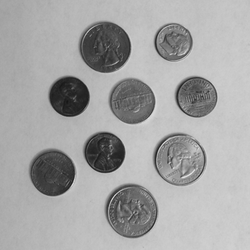

In [ ]:
filename = "coins.png"
path = os.path.join(FOLDER, filename)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

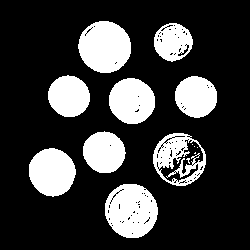

In [ ]:
(_, thresh) = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

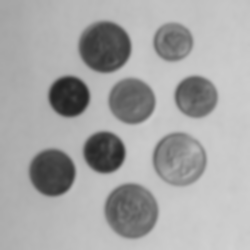

Thresholding after being blurred


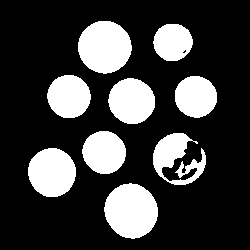

In [ ]:
# Blur to reduce noise
blur = cv2.GaussianBlur(image, (9,9), 0)
cv2_imshow(blur)

print("Thresholding after being blurred")
( _, thresh) = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

## 3. BLURRING

Blurring is an important step in image segmentation process that achieved by convolving the image with a low-pass filter kernel. When this filter is applied, it removes high frequency content, for example, image noise. Thus, leads to a better image segmentation.

The visual effect of blurring techniques is a smooth blur resembling that of viewing the image through a translucent screen, distinctly different from the bokeh effect produced by an out-of-focus lens or the shadow of an object under usual illumination.

*Example: Image after being blurred*

![](https://matthewpapps.files.wordpress.com/2013/03/blur.png)


*Example: How blur kernel works.*

![](https://datacarpentry.org/image-processing/fig/05-blur-demo.gif)

### 3.1 Average Filter

Also known as Box Filter, Mean Filter.


It simply takes the average of all the pixels under kernel area and replaces the central element with this average. All the pixels which belong to the kernel are given equal weight.

Important features of average filter:
* It must be odd ordered
* Sum of all the elements should be 1
* All the elements should be equal

*Example: A 3x3 filter*

<img src="https://i.imgur.com/Z6fSwpG.png" height=200> 

***Without padding***

<img src="https://i.imgur.com/AH33O0K.png" height=300>


***Value padding***

<img src="https://i.imgur.com/5Ly9odR.png" height=300>


***Zeroes padding***

<img src="https://i.imgur.com/n7oYBo6.png" height=300>

Some potential problems: 
* A single pixel with a very unrepresentative value and significantly affect the average value of all the pixels in its neighborhood.
* When the filter neighborhood straddles an edge, the filter will interpolate new values for pixels on the edge and so will blur that edge. This maybe a problem if sharp edges are required in the output.


Implement with OpenCV:
```
cv2.blur(input, (kernel_size))
```

Averaged


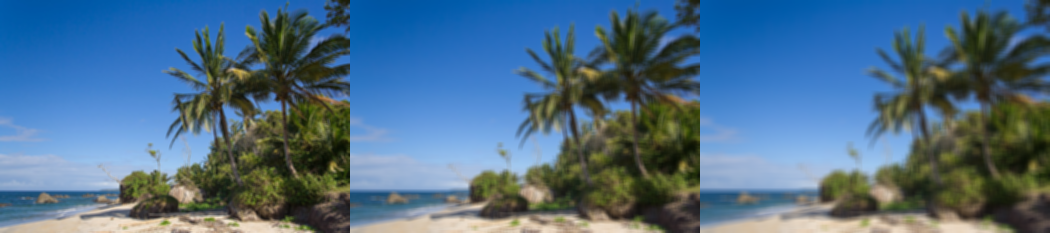

In [ ]:
filename = 'beach.png'
path = os.path.join(FOLDER, filename)
image = cv2.imread(path)

# Average Filter
print("Averaged")
blurred = np.hstack(
[cv2.blur(image,(3,3)),
cv2.blur(image,(5,5)),
cv2.blur(image,(7,7))])
cv2_imshow(blurred)

### 3.2 Gaussian Filter

The Gaussian blur is a type of linear image-blurring filters that uses a Gaussian function for calculating the transformation to apply to each pixel in the image. The formula of a Gaussian function in one dimension is:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6717136818f2166eba2db0cfc915d732add9c64f)

* `x` is the distance from the origin in the horizontal axis
* `y` is the distance from the origin in the vertical axis
* `σ` is the standard deviation of the Gaussian distribution

🔆 When using Average Filter, each pixel of the kernel is assigned with an equal weight. When using Gaussian Filter, a weighted average of the color values is calculated using Gaussian function for each pixel in the kernel. The pixels nearest the center of the kernel are given more weight than those far away from the center.


<p align='center'>
<img src="https://www.jobilize.com/ocw/mirror/col11500_1.4_complete/m45861/gaussian_1_0_1.png" width=500>
<br>
<br>
<i> 2D visualization of a Gaussian distribution</i>
</p>

<br>

<p align='center'>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3f674ec9b01758c64bedeaf133331659b09790b4" width=800>
<br>
<br>
<i> A sample Gaussian matrix</i>
</p>

<br>
<p align='center'>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Cappadocia_Gaussian_Blur.svg/500px-Cappadocia_Gaussian_Blur.svg.png" width=300>
<br>
<br>
<i> Experiment different sigma value</i>
</p>



Implement with OpenCV:


```
cv2.GaussianBlur(input, (kernel_size), sigma)
```

If sigma = 0, OpenCV will compute it based on the kernel width and kernel height.



Gaussian


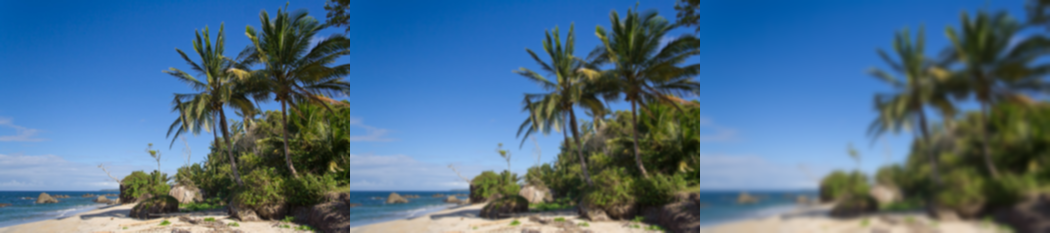

In [ ]:
# Gaussian Filter
print("Gaussian")
blurred = np.hstack(
[cv2.GaussianBlur(image,(3,3),0),
cv2.GaussianBlur(image,(5,5),0),
cv2.GaussianBlur(image,(15,15),0)])
cv2_imshow(blurred)

### 3.3 Bilateral Filter

Non-linear image-smoothing method, that is effective in edge preserving.

Similarly to the Gaussian convolution, the bilateral filter is also defined as a **weighted average** of pixels.  Each pixel is replaced by a weighted average of its neighbors. Each neighbor is weighted by a spatial component that penalizes distant pixels and range component that penalizes pixels with a different intensity. The combination of both components ensures that only nearby similar pixels contribute to the final result.

The bilateral filter, denoted by **BF[.]**, is defined by:

<img src="https://i.imgur.com/Hm3rYPV.png" width=500>

Where W(p) is a normalization factor: 

<img src="https://i.imgur.com/vfErjki.png" width=300>

Parameters `σs` and `σr` will measure the amount of filtering for the image `I`.The first equation is a normalized weighted average where:
* `G(σs)` is a spatial Gaussian that decreases the influence of
distant pixels. Increasing `σs` smooths larger features.

* `G(σr)` a range Gaussian that decreases the influence of pixels q with an intensity value different from Ip. As the range parameter σr increases, the bilateral filter becomes closer to Gaussian blur because the range Gaussian is flatter *i.e.*, almost a constant over the intensity interval covered by the image.

*Note that the term range qualifies quantities related to pixel values, by opposition to space which refers to pixel location.*

<p align=center>
<img src="https://i.imgur.com/xTlfcWq.png" width=800>
<br>
<i>Experiment on different σs and σr - Massachusetts Institute of Technology</i>
</p>


Implement in OpenCV:



```
cv2.bilateralFilter(input, d, SigmaColor, SigmaSpace)
```

* `d` - Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace .
* `SigmaColor` - Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace ) will be mixed together, resulting in larger areas of semi-equal color.
* `SigmaSpace` – Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0 , it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

🔆 As common practice, the two `Sigma` values are often set the same. The bigger they are, the stronger "blurring" result is. As for the `d` value Large filters (d > 5) are very slow, so it is recommended to use d=5 for real-time applications, and perhaps d=9 for offline applications that need heavy noise filtering.



bilateralFilter


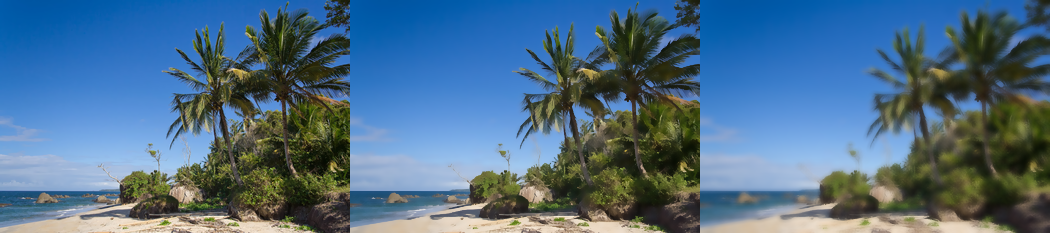

In [ ]:
blurred = np.hstack(
[cv2.bilateralFilter(image,5,7,7),
cv2.bilateralFilter(image,7,50,50),
cv2.bilateralFilter(image,9,200,200)])
print("bilateralFilter")
cv2_imshow(blurred)

Comparasion of results from 3 methods.

Averaged Filter


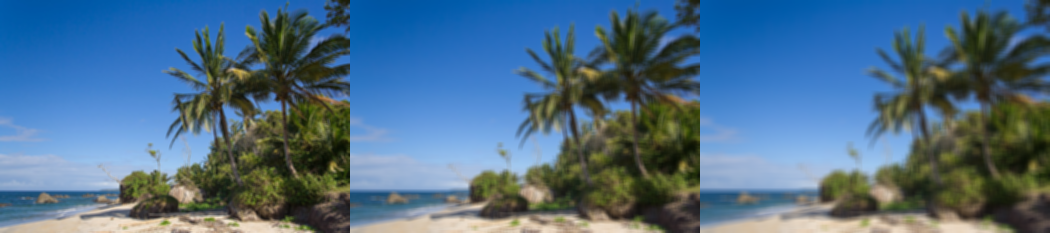

Gaussian Filter


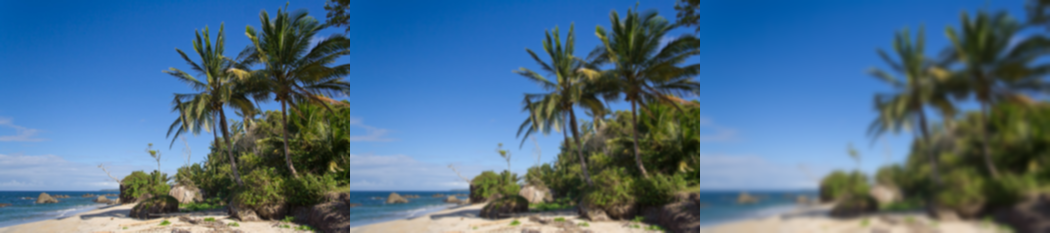

Bilateral Filter


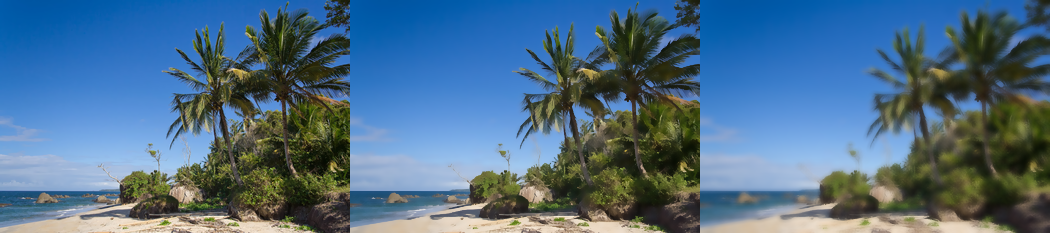

In [ ]:
print("Averaged Filter")
blurred = np.hstack(
[cv2.blur(image,(3,3)),
cv2.blur(image,(5,5)),
cv2.blur(image,(7,7))])
cv2_imshow(blurred)

print("Gaussian Filter")
blurred = np.hstack(
[cv2.GaussianBlur(image,(3,3),0),
cv2.GaussianBlur(image,(5,5),0),
cv2.GaussianBlur(image,(15,15),0)])
cv2_imshow(blurred)

print("Bilateral Filter")
blurred = np.hstack(
[cv2.bilateralFilter(image,5,7,7),
cv2.bilateralFilter(image,7,50,50),
cv2.bilateralFilter(image,9,200,200)])
cv2_imshow(blurred)

## 4. ADAPTIVE THRESHOLD

Similar with conventional thresholding, Adaptive Threshold takes a grayscale or color as an input and output a binary image representing segmentation. However, unlike Thresholding that applies a global threshold value to every pixel, Adaptive Threshold calculates a local threshold for each pixel. In other words, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination. 

Read more at: http://homepages.inf.ed.ac.uk/rbf/HIPR2/adpthrsh.htm

Adaptive Threshold work better than the conventional Threshold especially with images containing a strong illumination gradient. Or in a more general term, image whose global intensity histogram doesn't contain distinctive peaks.

![alt text](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/ada_threshold.jpg)

Implement in OpenCV:



```
cv2.adaptiveThreshold(input, maxValue, adaptiveMethod, thresholdType, blockSize, C)
```

* `maxValue` – Max pixel value.
* `adaptiveMethod` – Adaptive thresholding algorithm to use, `cv2.ADAPTIVE_THRESH_MEAN_C` or `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` . 
* `thresholdType` – Thresholding type that must be either `THRESH_BINARY` or `THRESH_BINARY_INV` .
* `blockSize` – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
* `C` – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.

**cv.ADAPTIVE_THRESH_MEAN_C**: The threshold value is the mean of the neighbourhood area minus the constant C.
**cv.ADAPTIVE_THRESH_GAUSSIAN_C**: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.


Blur


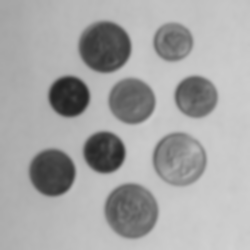

Adaptive Thresh Mean


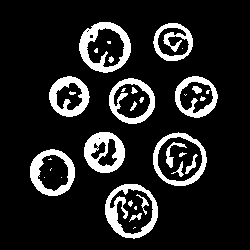

In [ ]:
filename = "coins.png"
path = os.path.join(FOLDER, filename)

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(image, (9,9), 0)
print("Blur")
cv2_imshow(blur)

# adaptiveThreshold mean
mean= cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
print("Adaptive Thresh Mean")
cv2_imshow(mean)

Adaptive Thresh Gaussian


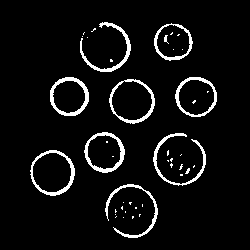

In [ ]:
# adaptiveThreshold gaussian
mean= cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 4)
print("Adaptive Thresh Gaussian")
cv2_imshow(mean)

## 5. EDGE DETECTION

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/%C3%84%C3%A4retuvastuse_n%C3%A4ide.png/500px-%C3%84%C3%A4retuvastuse_n%C3%A4ide.png' width=900>

**Edge detection** includes a variety of mathematical methods that aim at **identifying points in a digital image at which the image brightness changes sharply** or, more formally, has discontinuities. The points at which image brightness changes sharply are typically organized into a set of curved line segments termed *edges*. 

***Why do we need edge detection?***

The sharp changes in image brightness can imply important events and changes of properties in the image. For example, the discontinuities in image brightness are likely to correspond to:

* discontinuities in depth,
* discontinuities in surface orientation,
* changes in material properties and
* variations in scene illumination.

In the ideal case, the result of applying an edge detector to an image may lead to a set of connected curves that indicate the boundaries of objects, the boundaries of surface markings as well as curves that correspond to discontinuities in surface orientation. Thus, applying an edge detection algorithm to an image may significantly reduce the amount of data to be processed and may therefore filter out information that may be regarded as less relevant, while preserving the important structural properties of an image.

3 common methods to detect edges are Sobel, Laplacian, and Canny. All of them work with convolutions.

### 5.1 Sobel

The Sobel edge detector is a gradient based, convolutional method.

The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.

<img src='https://aishack.in/static/img/tut/sobel-kernels1.jpg' width=400>

<img src='https://i.imgur.com/lJ06wfw.gif' height=400>

The combination of horizontal edge and vertical edge is calculated by:
![](http://s0.wp.com/latex.php?latex=%5Csqrt%7BG_x%5E2%20%2B%20G_y%5E2%7D&bg=ffffff&fg=000&s=0)


We can also calculate the orientation of the edge by: ![](http://s0.wp.com/latex.php?latex=%5Carctan%28%5Cfrac%7BG_y%7D%7BG_x%7D%29&bg=ffffff&fg=000&s=0)

<img src='https://i.imgur.com/R4rrtl8.png' height=400><img src='https://i.imgur.com/AYjkQLU.png' width=600>

**Implement with OpenCV**



```
cv2.Sobel(input, output_type, x_axis, y_axis)
```

**Note** on `output_type`: Commonly with OpenCV, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. 



sobelX


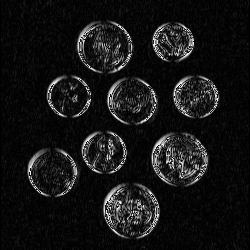

sobelY


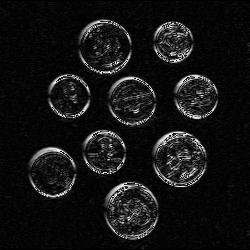

sobel_combined


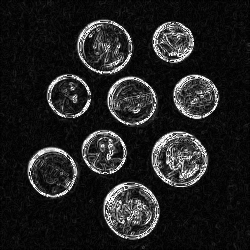

In [ ]:
# Calculate each axis edge
sobelX = cv2.Sobel(image,cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image,cv2.CV_64F, 0, 1)

# Convert values into uint8 datatype
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# Combine two edges
sobel_combined = cv2.bitwise_or(sobelX,sobelY)

# Display
print("sobelX")
cv2_imshow(sobelX)
print("sobelY")
cv2_imshow(sobelY)
print("sobel_combined")
cv2_imshow(sobel_combined)

### 5.2 Laplacian

Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.

If ksize = 1, the using filter will be

![](https://i.imgur.com/f6A8Zvg.png)

Original


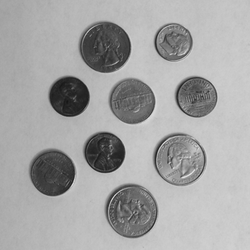

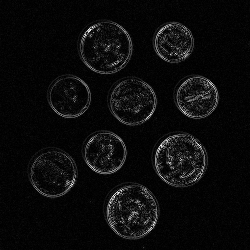

In [ ]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original")
cv2_imshow(image)

# Laplacian technique
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

**Comparison between Sobel and Laplacian**

<img src='https://www.bogotobogo.com/python/OpenCV_Python/images/EdgeDetect/SanFrancisco_out.png' width=456> <img src='https://www.bogotobogo.com/python/OpenCV_Python/images/EdgeDetect/EdgeDetection.png' width=400>

**Similarity in behavior between Sobel and CNN:**

https://mlnotebook.github.io/post/CNN1/

### 5.3 Canny

The Canny Edge detector was developed by John F. Canny in 1986. Also known to many as the optimal detector, Canny algorithm aims to satisfy three main criteria:
*  Low error rate: Meaning a good detection of only existent edges.
*  Good localization: The distance between edge pixels detected and real edge pixels have to be minimized.
*  Minimal response: Only one detector response per edge.

Read more about Canny edge detector: 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

Original


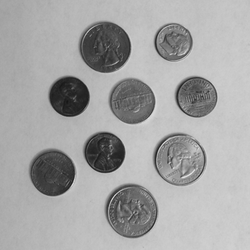

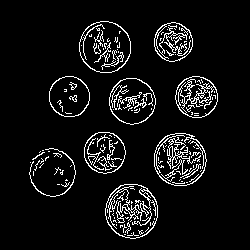

In [ ]:
print("Original")
cv2_imshow(image)

# show canny magic in action
canny = cv2.Canny(image, 60, 120)
cv2_imshow(canny)

## 6. CONTOURS

![](https://pyimagesearch.com/wp-content/uploads/2016/04/extreme_points_header.jpg)

**Contours** can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

* For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

* In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

Original


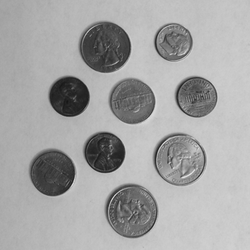

Blur


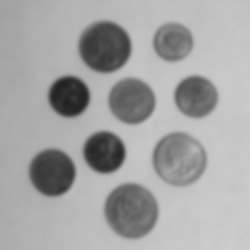

Finding edges using Canny


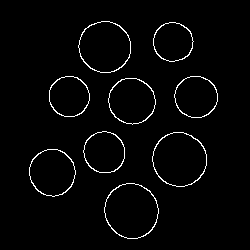

In [ ]:
image = cv2.imread('/content/drive/My Drive/FTMLE | 2020.09 | Kermadec/Week 9/images/coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original")
cv2_imshow(gray)

# blur it to reduce noise
blur = cv2.GaussianBlur(gray, (11,11),0)
print("Blur")
cv2_imshow(blur)

# # apply canny to find edges
edge = cv2.Canny(blur,30,150)
print("Finding edges using Canny")
cv2_imshow(edge)

### 6.1 Find Contours

**Implement with OpenCV:**
```
cv2.findContours(input, contour_retrieval_mode, contour_approximation_method)
```
**Output**: Contours and Hierarchy. 

Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.


[**Contour Retrieval Mode (Hierarchy)**: ](https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html)

![alt text](https://docs.opencv.org/3.4/hierarchy.png)

1. `RETR_LIST`: Retrieves all the contours, but doesn't create any parent-child relationship.
2. `RETR_EXTERNAL`: Returns only extreme outer flags. All child contours are left behind.
3. `RETR_CCOMP`: Retrieves all the contours and arranges them to a 2-level hierarchy.
4. `RETR_TREE`: The final guy, Mr.Perfect. It retrieves all the contours and creates a full family hierarchy list.


[**Countour Approximation Method**:](https://docs.opencv.org/trunk/d4/d73/tutorial_py_contours_begin.html)

![alt text](https://docs.opencv.org/trunk/none.jpg)

`cv.CHAIN_APPROX_NONE` or `cv.CHAIN_APPROX_SIMPLE`

If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

Above image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with cv.CHAIN_APPROX_NONE (734 points) and second image shows the one with cv.CHAIN_APPROX_SIMPLE (only 4 points). See, how much memory it saves!!

In [ ]:
# find contours with those nice edges
cnts = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts[0][0]

array([[[126, 183]],

       [[125, 184]],

       [[122, 184]],

       [[121, 185]],

       [[119, 185]],

       [[117, 187]],

       [[116, 187]],

       [[114, 189]],

       [[113, 189]],

       [[110, 192]],

       [[110, 193]],

       [[108, 195]],

       [[108, 196]],

       [[107, 197]],

       [[107, 198]],

       [[106, 199]],

       [[106, 201]],

       [[105, 202]],

       [[105, 206]],

       [[104, 207]],

       [[104, 212]],

       [[105, 213]],

       [[105, 217]],

       [[106, 218]],

       [[106, 220]],

       [[107, 221]],

       [[107, 222]],

       [[108, 223]],

       [[108, 224]],

       [[111, 227]],

       [[111, 228]],

       [[116, 233]],

       [[117, 233]],

       [[119, 235]],

       [[120, 235]],

       [[121, 236]],

       [[123, 236]],

       [[124, 237]],

       [[126, 237]],

       [[127, 238]],

       [[137, 238]],

       [[138, 237]],

       [[140, 237]],

       [[141, 236]],

       [[143, 236]],

       [[1

### 6.2 Draw Contours

```
cv.drawContours(input, contours, cnts_index, color, thickness)
```

`contours`: list of contour points, must be a Python list.
`cnts_index`: which contour to be draw. To draw all the contours, pass in -1.

**Example:**


* To draw all the contours in an image:
```
cv.drawContours(img, contours, -1, (0,255,0), 3)
```
* To draw an individual contour, say 4th contour:
```
cv.drawContours(img, contours, 3, (0,255,0), 3)
```
* But most of the time, below method will be useful:
```
cnt = contours[4]
cv.drawContours(img, [cnt], 0, (0,255,0), 3)
```

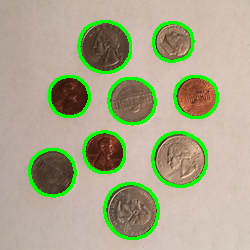

There are 9 coints in this image


In [ ]:
# To be safe, make a copy of the original image
coins = image.copy()

# Draw countours
cv2.drawContours(coins, cnts[0], -1, (0,255,0), 2)

# Display and count the nunber of the coins in the image (behold, magic !!!)
cv2_imshow(coins)
print("There are {} coints in this image".format(len(cnts[0])))

### 6.3 Bounding Rect

Instead of bounding line around the object, we'll draw rectangle.

29 149 47 48


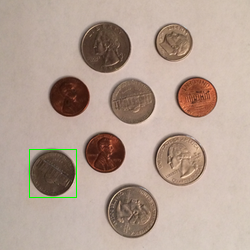

In [ ]:
# Get rectangle info
(x, y, w, h) = cv2.boundingRect(cnts[0][1])
print(x, y, w, h)

# Draw the rectangle
result = cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255, 0), 1)
cv2_imshow(result)

## EXERCISE: Count the Tentrix pieces

Expected output:
 
![](https://i.imgur.com/Vb2euSL.png)

Hint: From contours of an object to find the center point



```
  M = cv2.moments(object_contours)
  cX = int(M["m10"] / M["m00"]) #centerX
  cY = int(M["m01"] / M["m00"]) #centerY
```



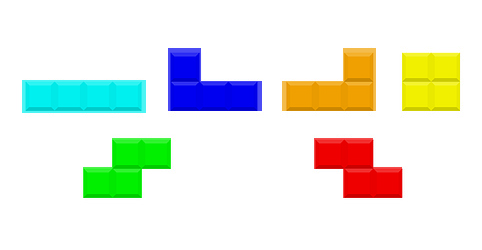

In [ ]:
file_name = "blocks.png"
absolute_path = os.path.join(FOLDER, file_name)
image = cv2.imread(absolute_path)
cv2_imshow(image)

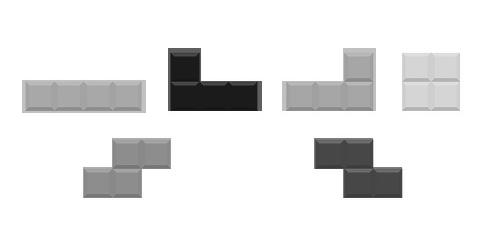

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

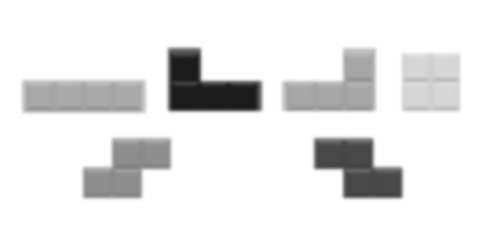

In [ ]:
blur = cv2.GaussianBlur(gray, (9, 9), 0)
cv2_imshow(blur)

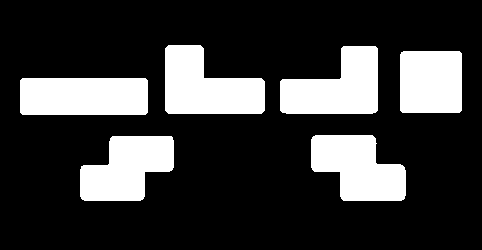

In [ ]:
(_, thresh) = cv2.threshold(blur, 250, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

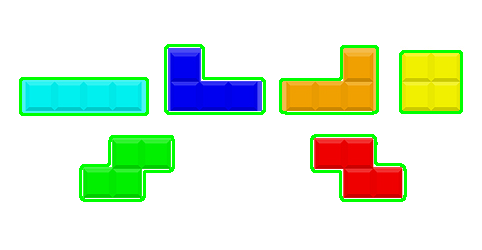

In [ ]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts[0], -1, (0, 255, 0), 2)
cv2_imshow(image)

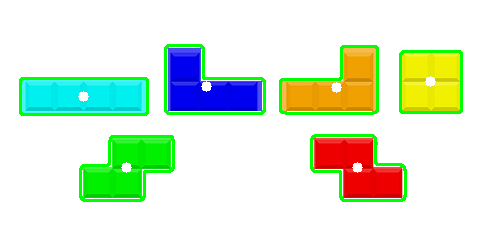

In [ ]:
for c in cnts[0]:
  M = cv2.moments(c)
  cX = int(M["m10"] / M["m00"]) #centerX
  cY = int(M["m01"] / M["m00"]) #centerY

  cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)

cv2_imshow(image)

## CHALLENGE: FISH COUNTING

In this exercise, let's count how many fish are there per color.

**HELPFUL LINKS:**

Color segmentation in an HSV image with cv2.inRange

1. https://realpython.com/python-opencv-color-spaces/
2. Small cheatsheat on getting HSV color value
https://stackoverflow.com/a/48367205
3. cv2.morphologyEx on removing noise and fill-in color mask block
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

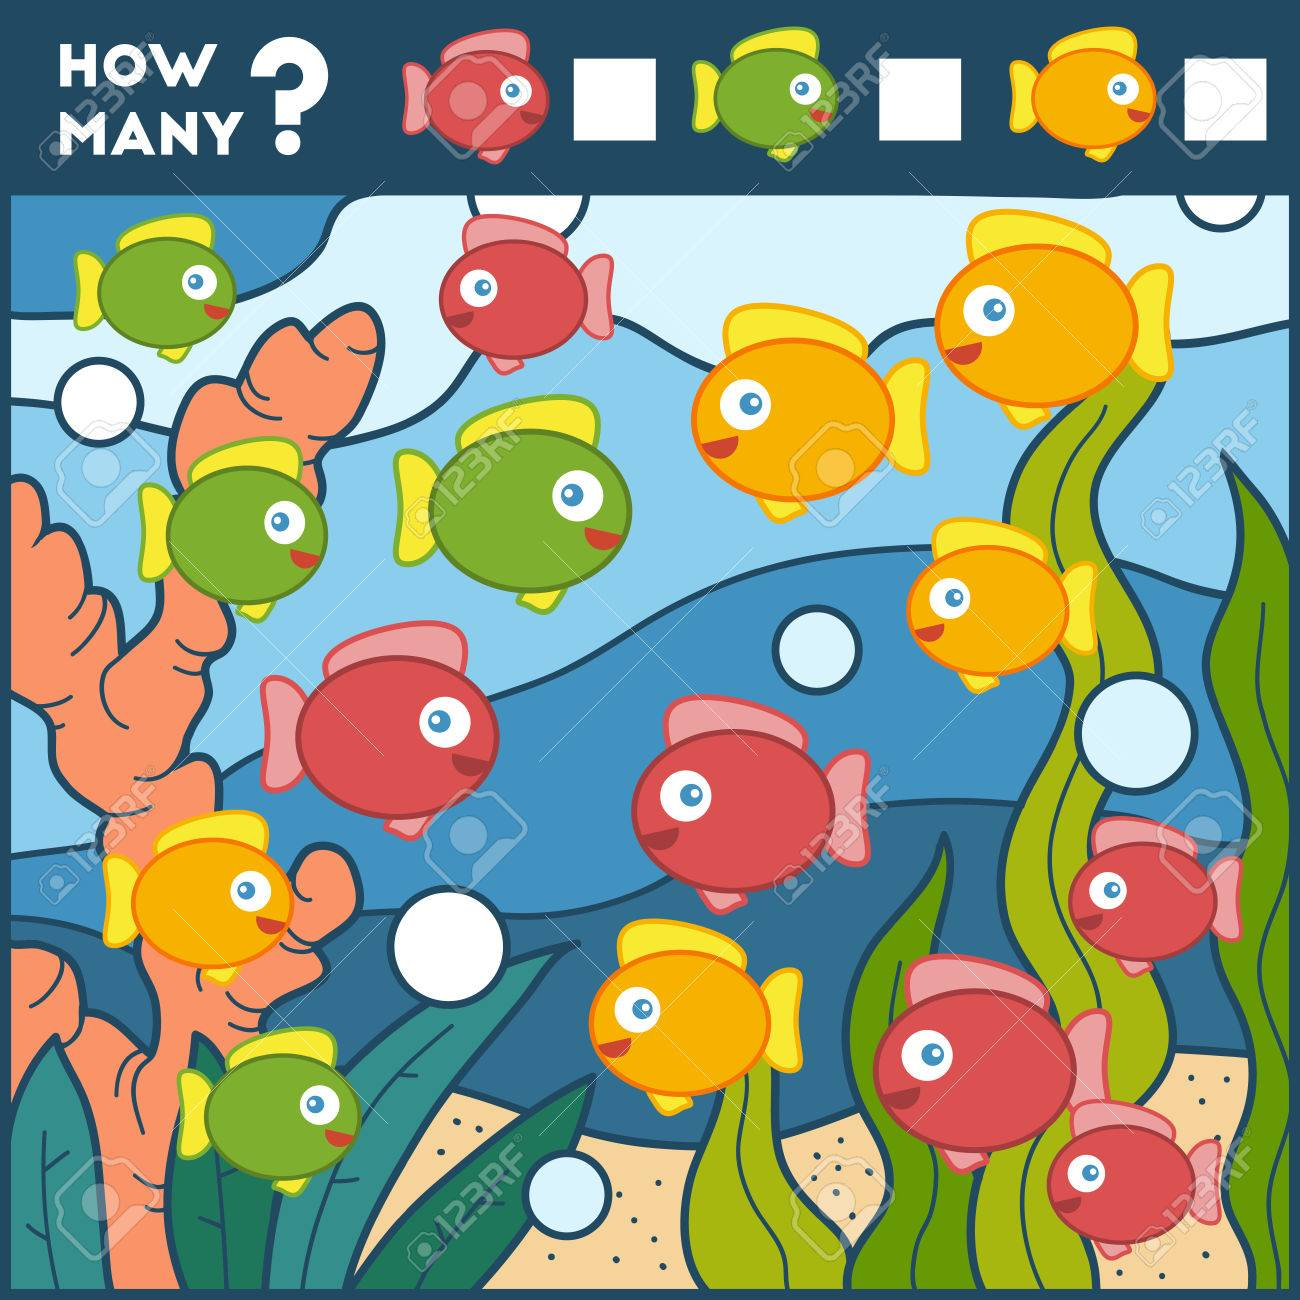

In [ ]:
# STEP 1: Load image and change it into HSV 
image = cv2.imread("/content/drive/MyDrive/FTMLE | 2020.09 | Kermadec/Week 9/images/Ex2.jpg")
cv2_imshow(image)

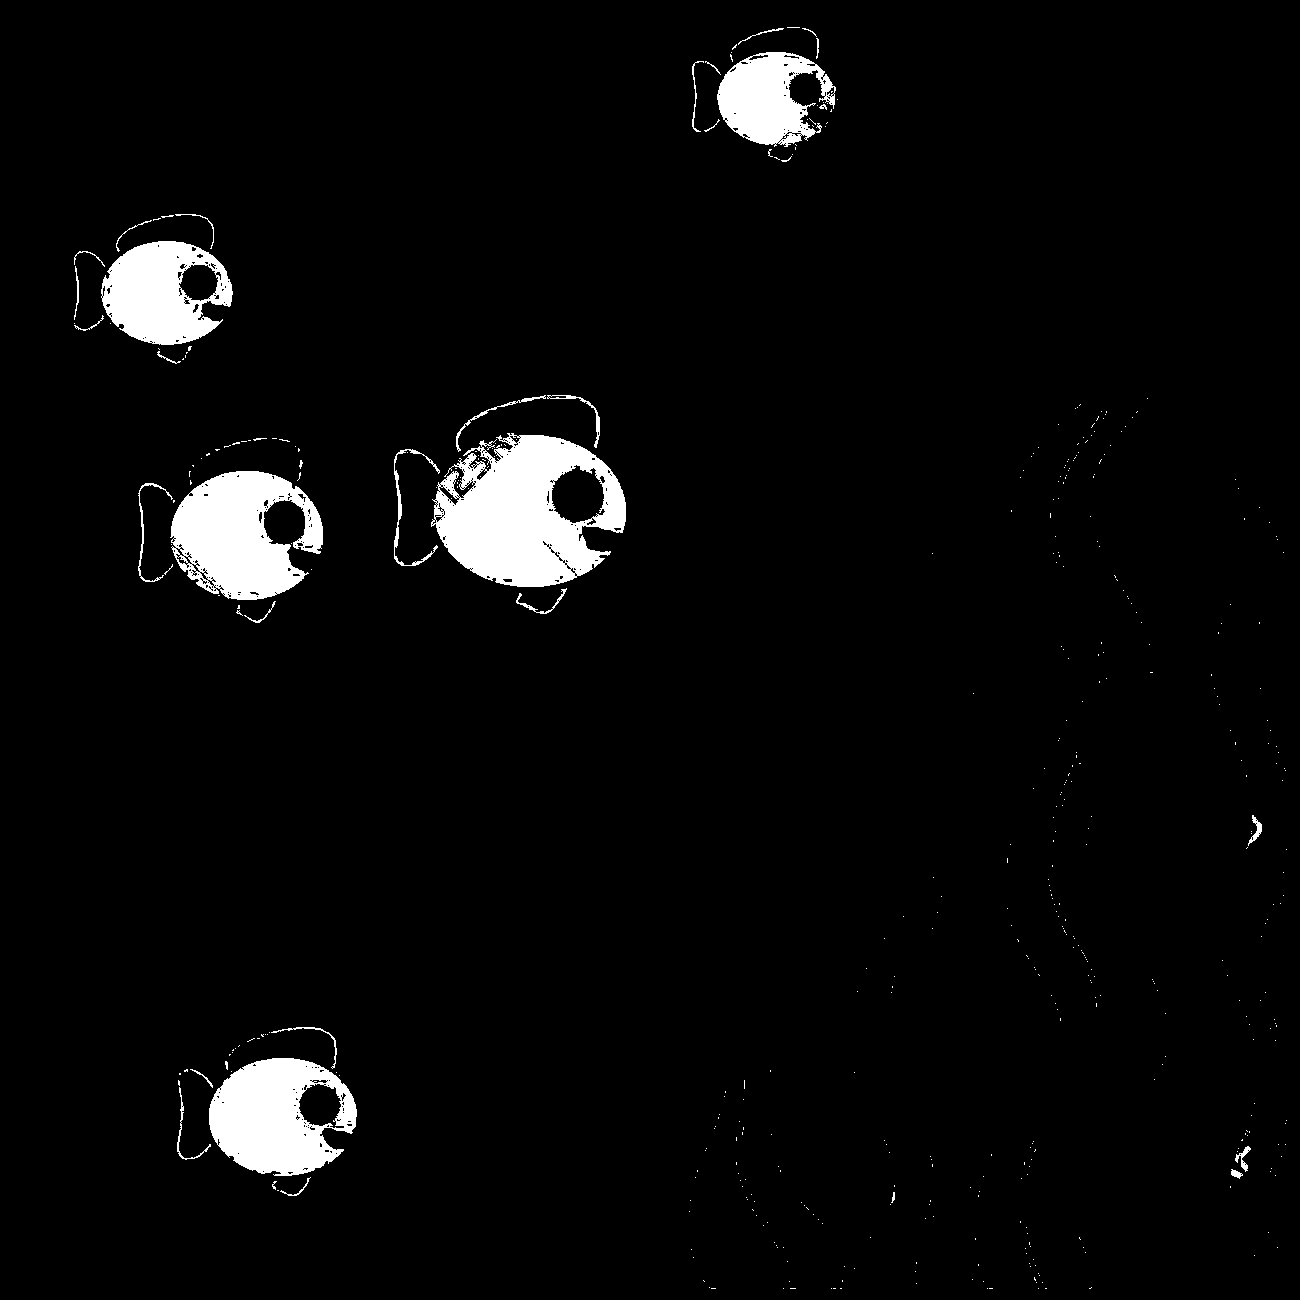

In [ ]:
# STEP 1: Load image and change it into HSV 
image = cv2.imread("/content/drive/MyDrive/FTMLE | 2020.09 | Kermadec/Week 9/images/Ex2.jpg")
# cv2_imshow(image)

# STEP 2: Define a color profile, each includes HSV's Lower-bound, Upper-bound for masking.  
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2_imshow(hsv)

# STEP 3: Loop through each color, mask out the fish by inRange and remove noise by MorphologyEx
mask = cv2.inRange(hsv, (40, 100, 160), (50, 200, 190))
cv2_imshow(mask)

# opening_kernel = np.ones((5,5), np.uint8)
# closing_kernel = np.ones((20,20), np.uint8)

# opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, opening_kernel)
# # cv2_imshow(opening)
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, closing_kernel)
# # cv2_imshow(closing)

# (cnts, _) = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# count = 0
# for c in cnts: 
#     (x, y, w, h) = cv2.boundingRect(c)

#     if w*h > 5000:
#       count += 1

# print('THERE ARE ', count, 'FISH')

# and count how many fish that have that color. Don't forget to print out the count.

In [ ]:
len(cnts)

24